#                                        Car Price Prediction

### IMPORT DEPENDENCIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as pt

### LOAD DATA

In [ ]:
data=pd.read_csv("F://AI Content//datasets//Car_price//CarPrice_Assignment.csv")

In [ ]:
data.head(5)

## EDA

In [4]:
data.size

5330

In [5]:
data.shape

(205, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### convert dtype of feature and droping useless column:

We have a feature "Symboling" which is numeric but we want to convert it into categorical feature because it has very minimum number of labels.

we will drop "CarID" it has no use.

In [7]:
data.drop(['car_ID'],axis=1,inplace=True)

In [8]:
data.drop(['CarName'],axis=1,inplace=True)

In [9]:
data['symboling']=data['symboling'].astype(str)

### CHECK MISSING AND DUPLICATED VALUES

In [10]:
data.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
data.duplicated().sum()

1

In [12]:
data=data.drop_duplicates()

In [13]:
cat=data.select_dtypes(include=["O"])
num=data.select_dtypes(include=['int','float'])
print("Number of categorical features  :",len(cat.columns))
print("Number of numerical features    :",len(num.columns))

Number of categorical features  : 10
Number of numerical features    : 14


### CATEGORICAL FEATURES

In [14]:
cat.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [15]:
cat['fueltype'].value_counts()

gas       184
diesel     20
Name: fueltype, dtype: int64

In [16]:
cat['aspiration'].value_counts()

std      167
turbo     37
Name: aspiration, dtype: int64

In [17]:
cat['doornumber'].value_counts()

four    114
two      90
Name: doornumber, dtype: int64

In [18]:
cat['carbody'].value_counts()

sedan          96
hatchback      69
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [19]:
cat['drivewheel'].value_counts()

fwd    119
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [20]:
cat['enginelocation'].value_counts()

front    201
rear       3
Name: enginelocation, dtype: int64

In [21]:
cat['enginetype'].value_counts()

ohc      147
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [22]:
cat['cylindernumber'].value_counts()

four      158
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [23]:
cat['fuelsystem'].value_counts()



mpfi    94
2bbl    65
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

### BAR PLOT OF CATEGORICAL FEATURES VS PRICE COLUMN:

In [24]:
def plot(df,feature):
    plt.figure(figsize=(10,3.5))
    plt.subplot(1,2,1)
    sns.barplot(x=cat[feature],y=df['price'])
    plt.title("Price Vs {}".format(feature))
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.subplot(1,2,2)
    sns.countplot(y=cat[feature])
    plt.title("Counts of {}".format(feature))
    plt.xlabel("Total counts")
    plt.ylabel(feature)
    plt.show()

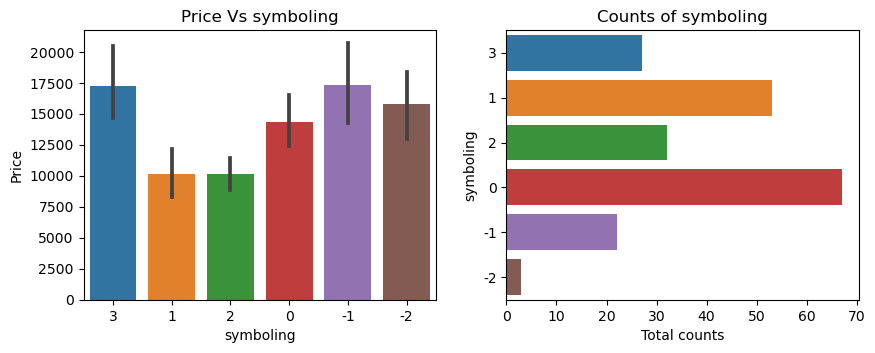

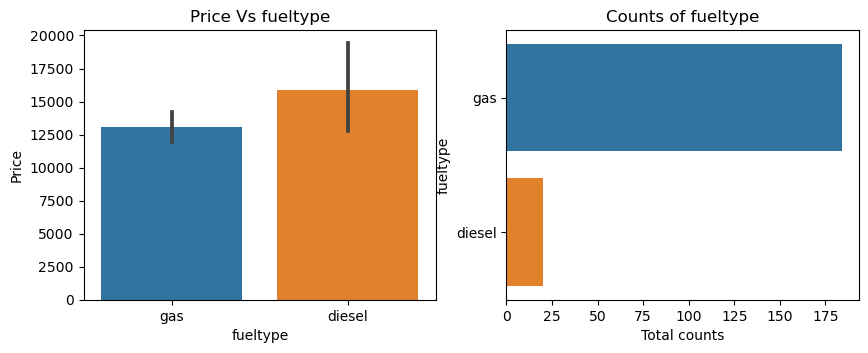

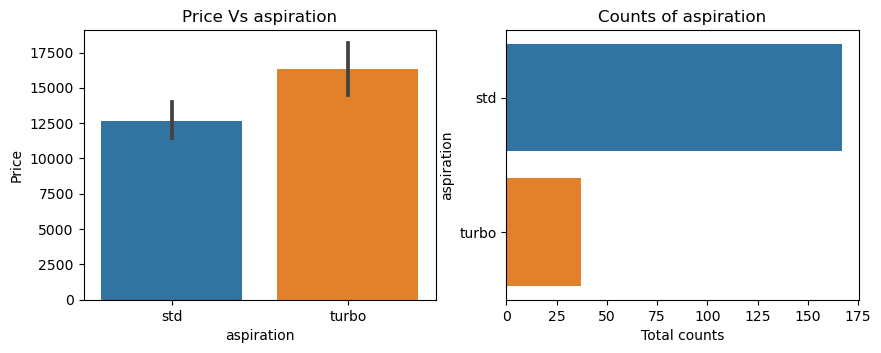

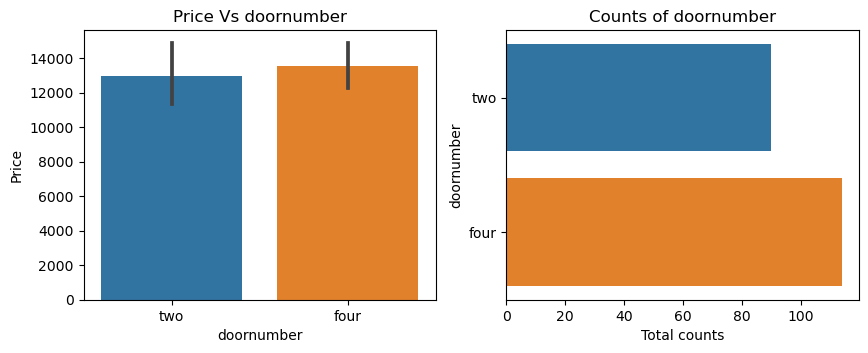

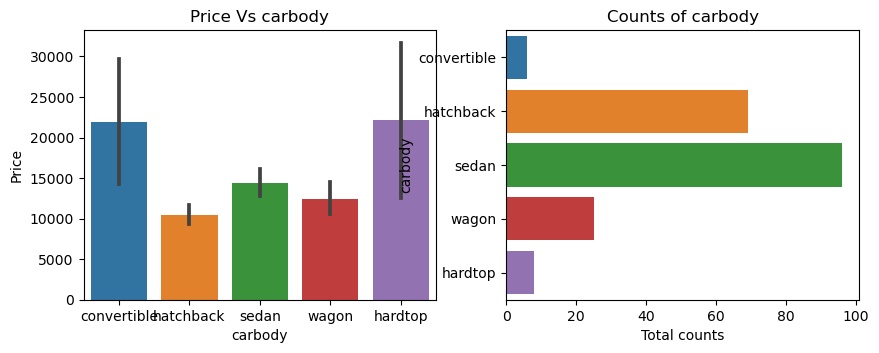

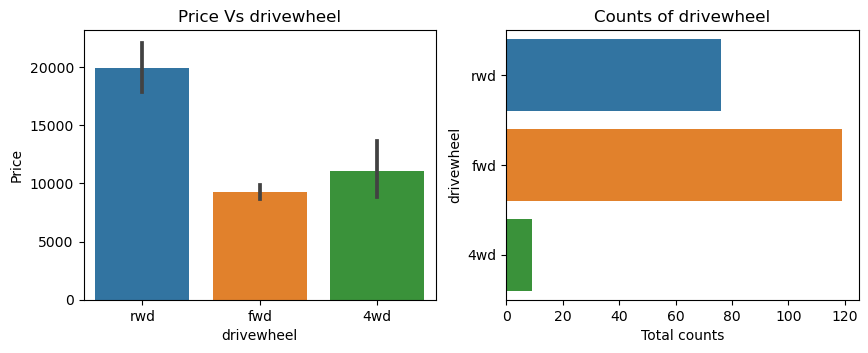

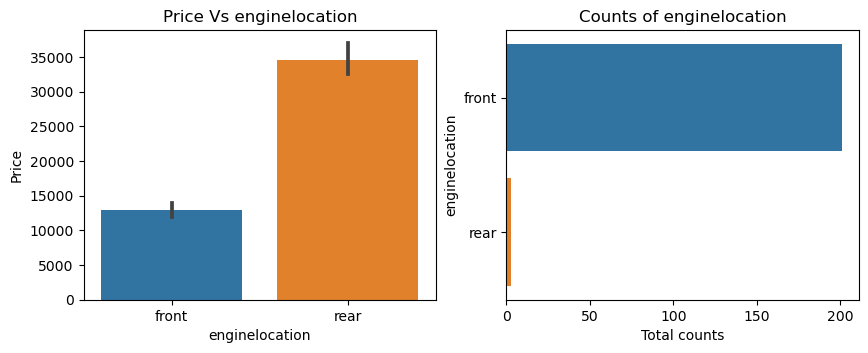

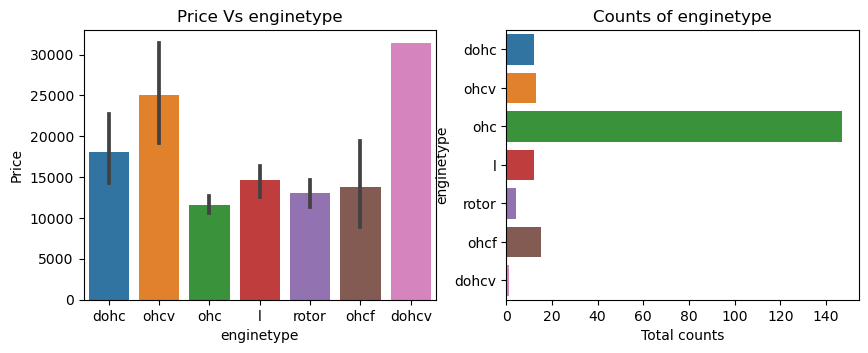

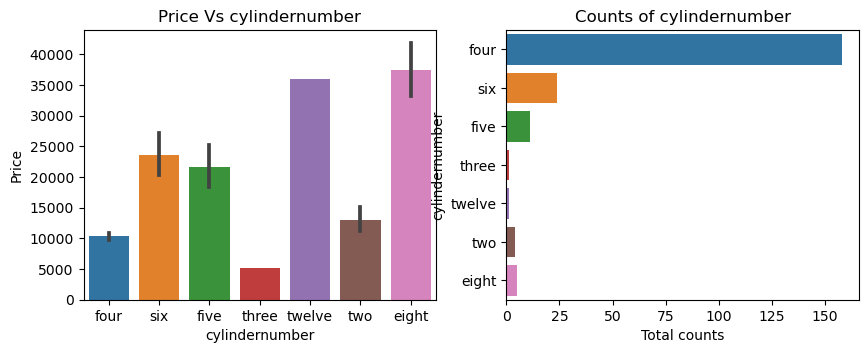

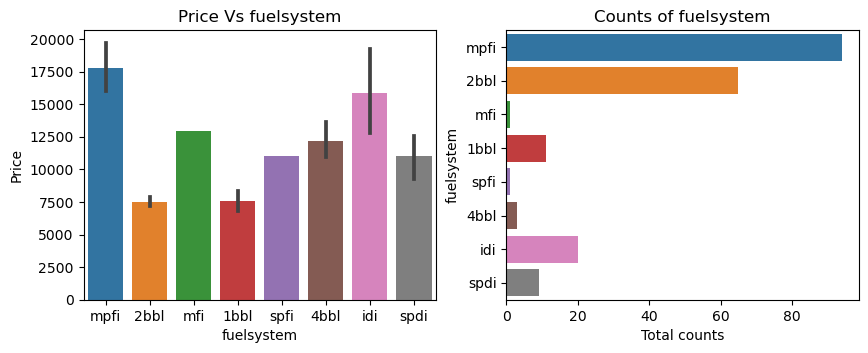

In [25]:
for i in cat.columns:
    plot(data,i)

### NUMERICAL FEATURES

### Descriptive analysis summary

In [26]:
num.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,98.781373,174.131373,65.918137,53.740196,2558.450980,127.088235,3.331520,3.255539,10.146176,104.294118,5123.284314,25.191176,30.715686,13311.258172
std,6.026096,12.311367,2.145361,2.439646,520.315831,41.664294,0.270328,0.314363,3.981469,39.559916,477.431033,6.545613,6.884519,7993.139194
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.675000,64.100000,52.000000,2163.000000,97.750000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7796.250000
50%,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10320.000000
75%,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16506.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Check distribution of numerical variables and relationship with "Price"

In [27]:
def plot_d(data,feature):
    plt.figure(figsize=(10,3.5))
    plt.subplot(1,2,1)
    sns.histplot(data[feature])
    plt.title("Distribution of {}".format(i))
    plt.xlabel(i)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    plt.scatter(data[feature],data['price'],c='red')
    plt.title("Price VS {}".format(i))
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

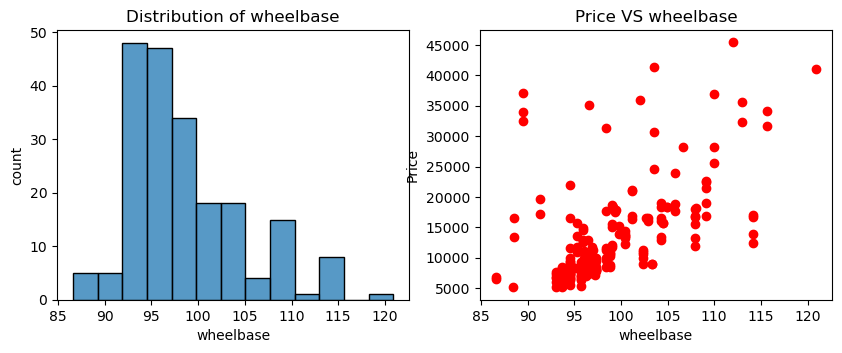

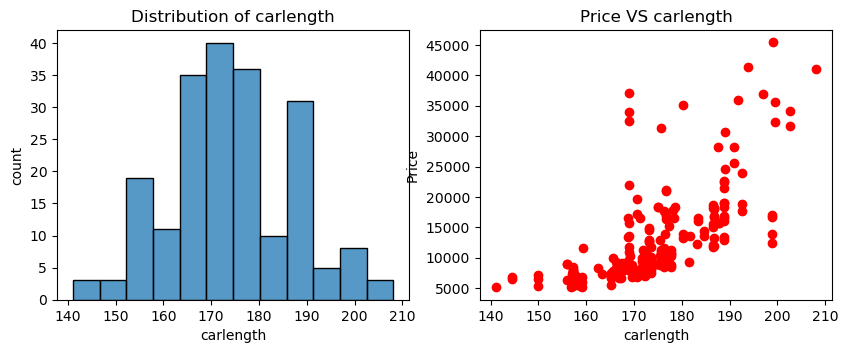

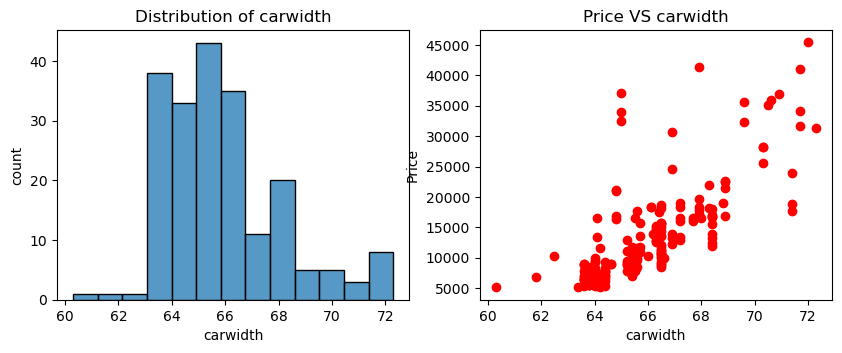

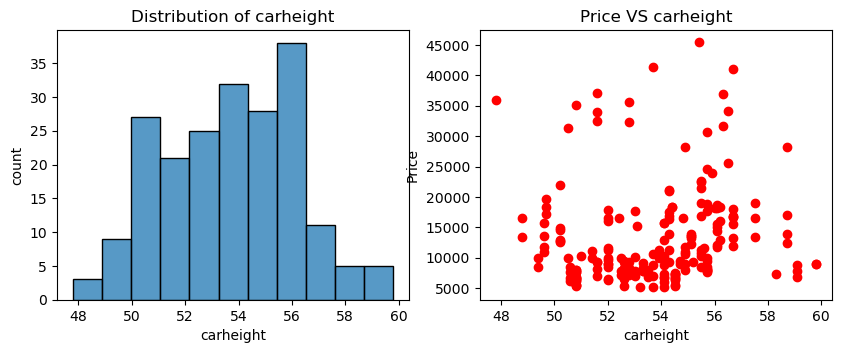

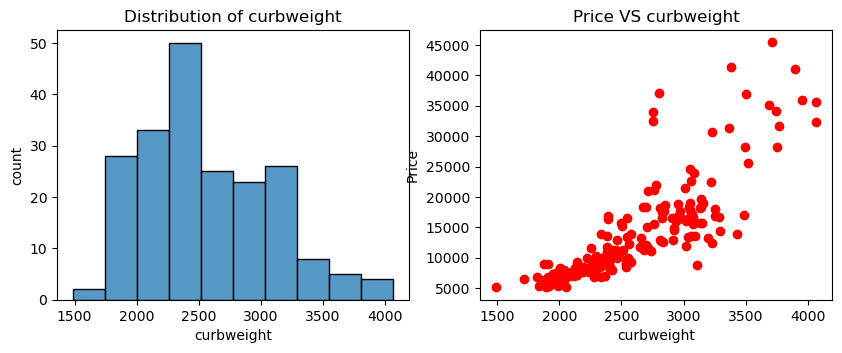

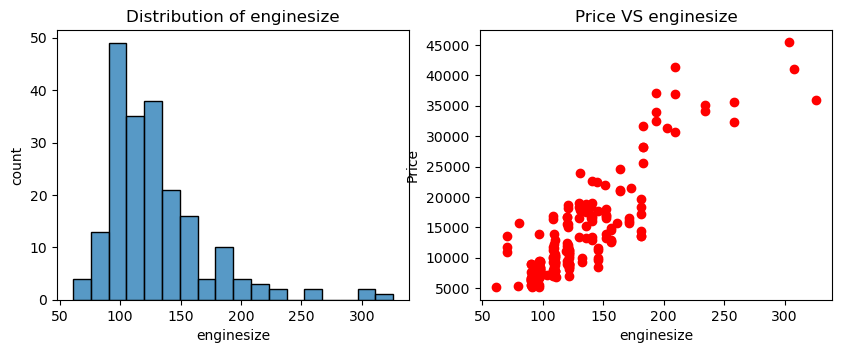

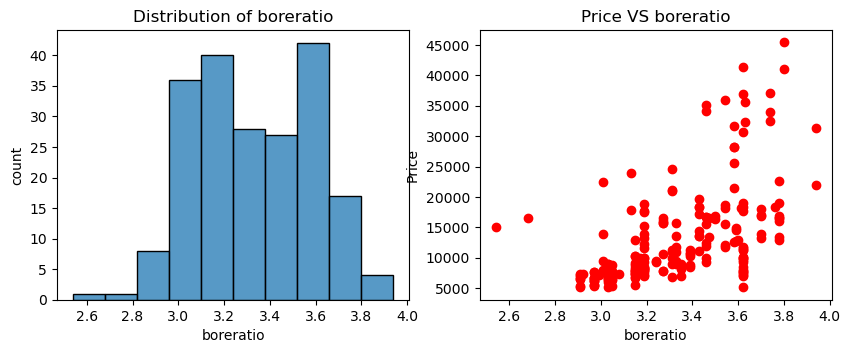

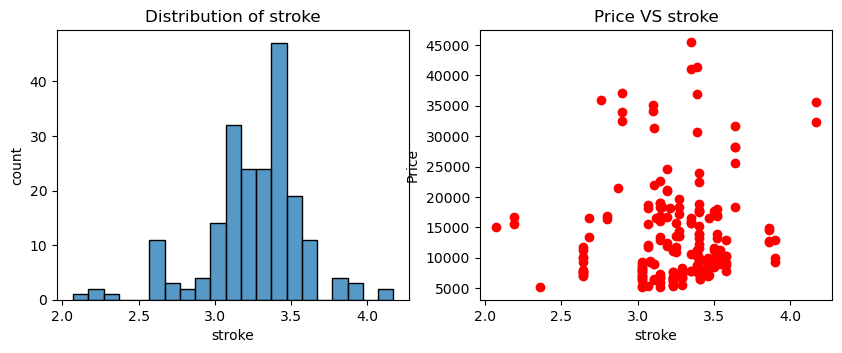

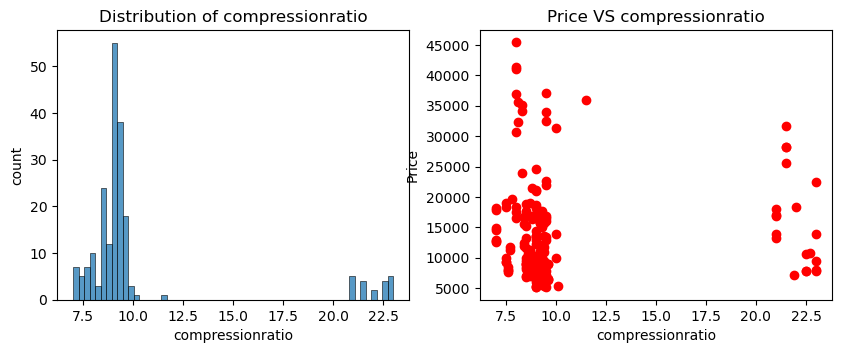

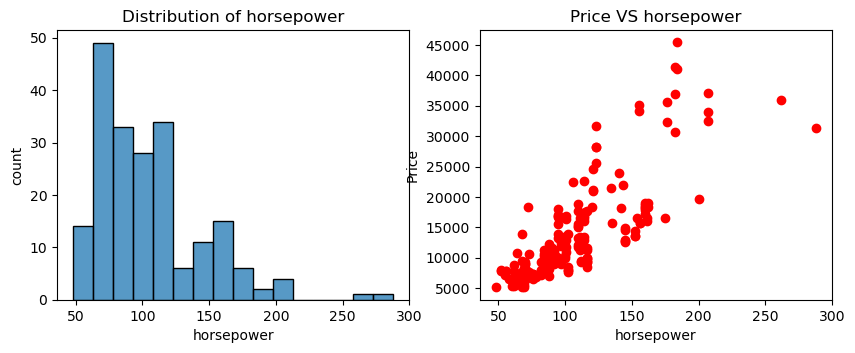

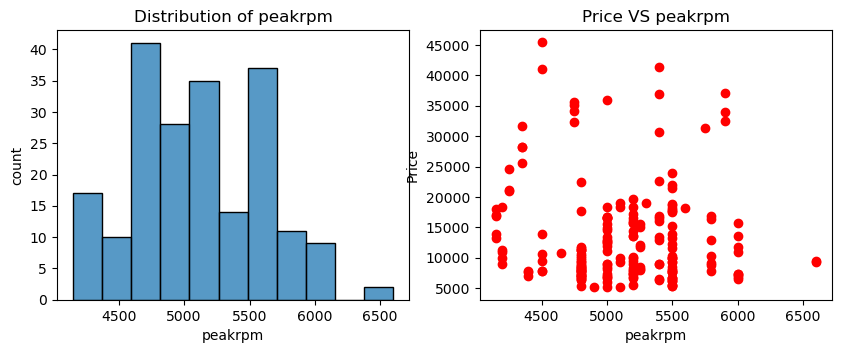

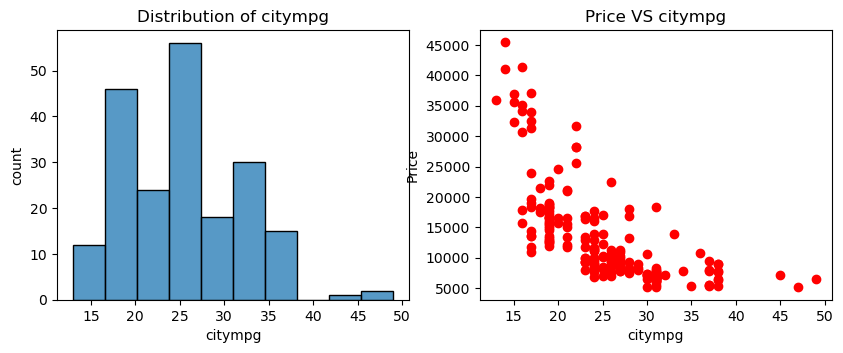

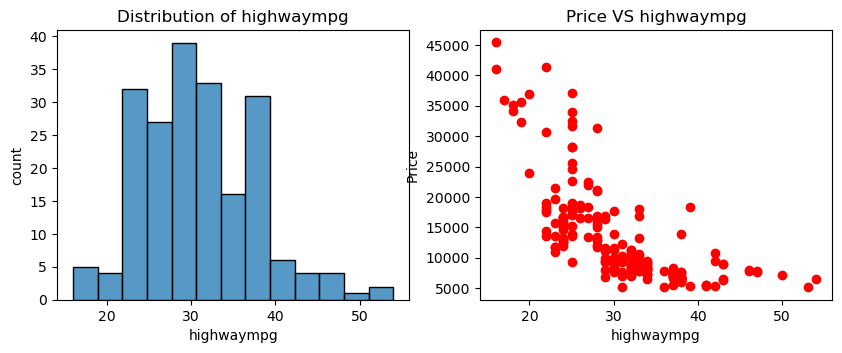

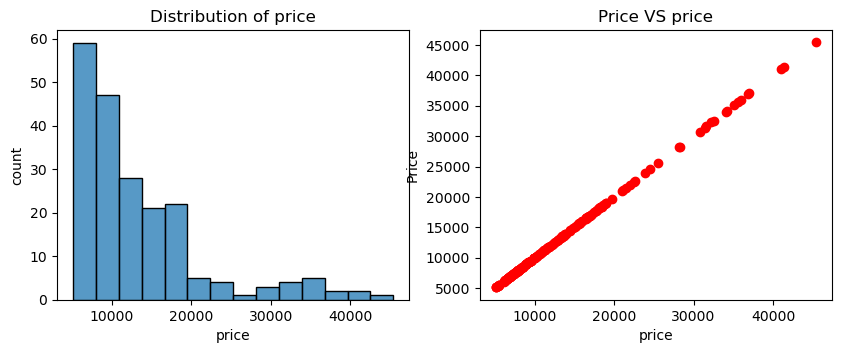

In [28]:
for i in num.columns:
    plot_d(num,i)

### SPEARMAN Correlation

C:\Users\swp\AppData\Local\Temp\ipykernel_9176\2672493178.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr('spearman'),annot=True)


<Axes: >

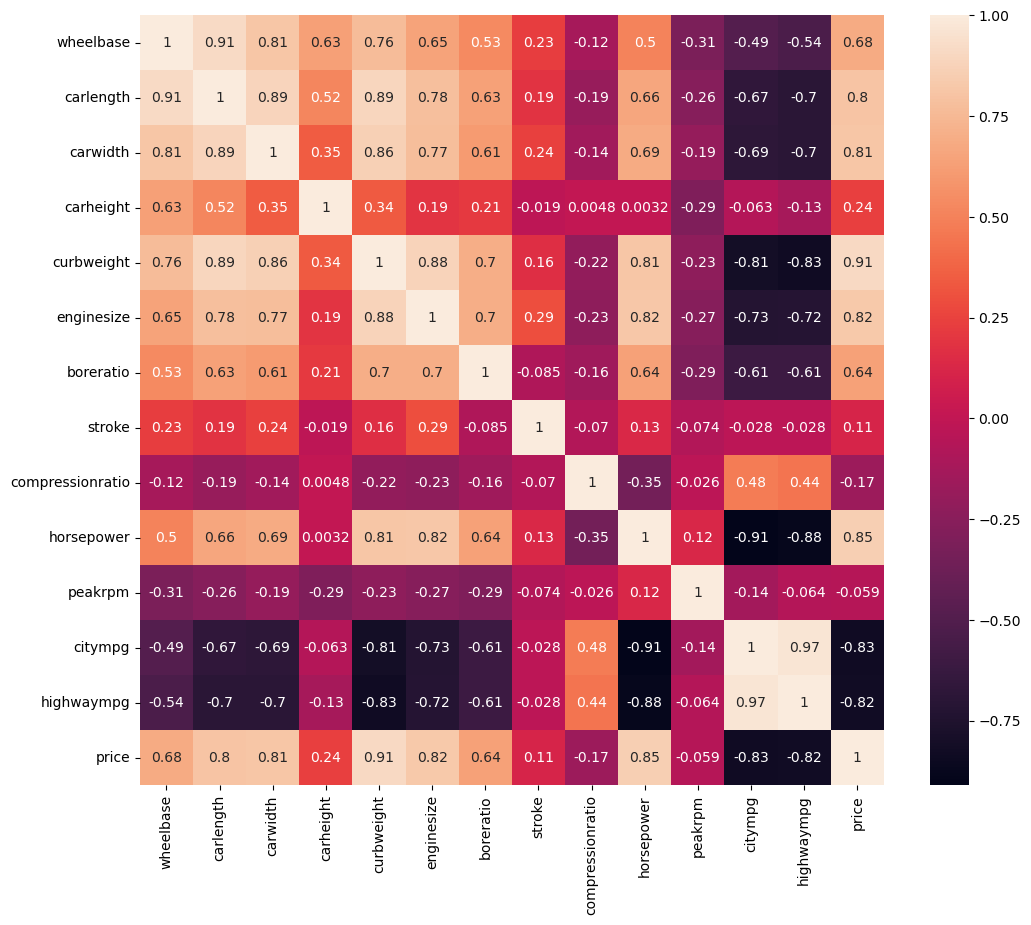

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr('spearman'),annot=True)

### Correlation with respect to price

In [30]:
data.corr()['price']

C:\Users\swp\AppData\Local\Temp\ipykernel_9176\2971354294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']


wheelbase           0.576272
carlength           0.681422
carwidth            0.758312
carheight           0.114460
curbweight          0.834620
enginesize          0.873658
boreratio           0.550852
stroke              0.079244
compressionratio    0.067306
horsepower          0.807376
peakrpm            -0.082134
citympg            -0.684540
highwaympg         -0.696260
price               1.000000
Name: price, dtype: float64

## DATA TRANSFORMATION

from above graphs we came to know that the data in numerical columns is not normally distriduted so we will use diferrent 

techniques to transform the data so that our Algorithm's accuracy will be improved. 

In [31]:
import scipy.stats as stats

In [54]:
copy=data.copy()

In [56]:
num=num.drop(['price'],axis=1)

In [57]:
def log(df,feature):
    df[feature]=np.log(df[feature])

In [58]:
for x in num.columns:
    log(copy,x)

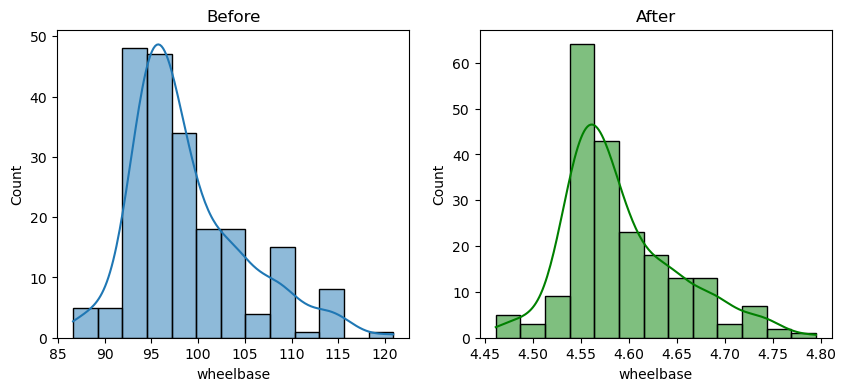

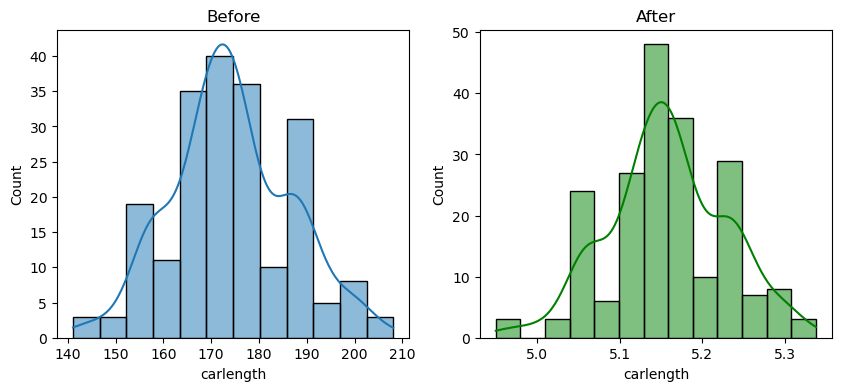

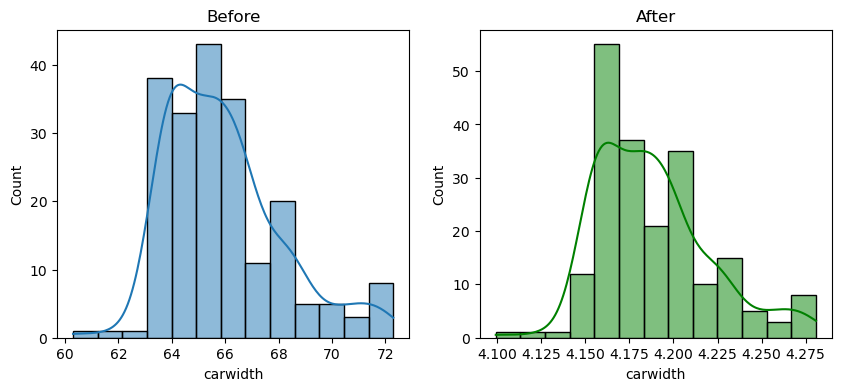

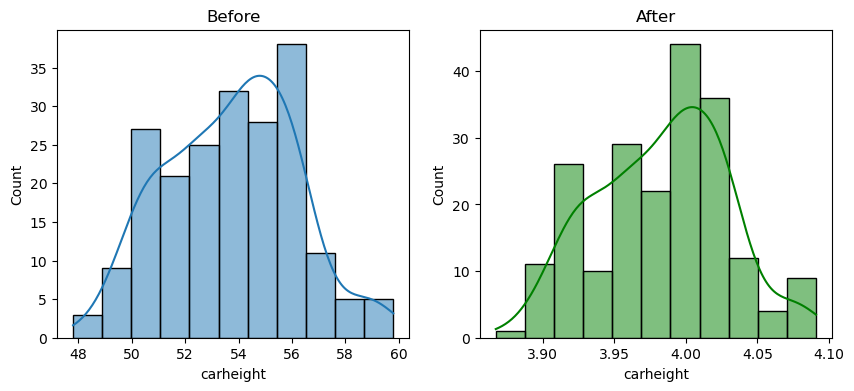

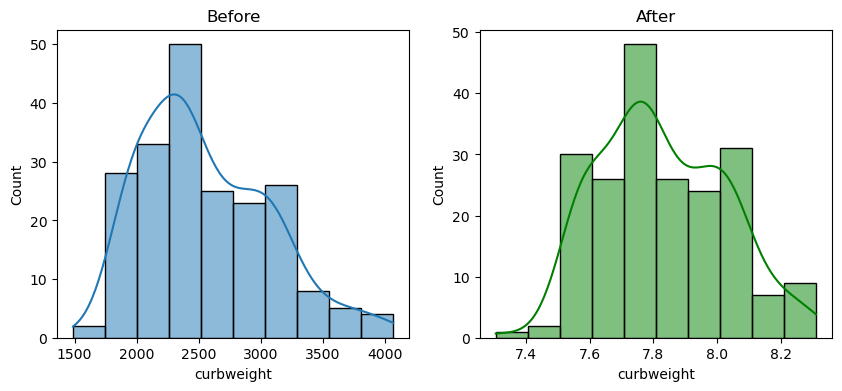

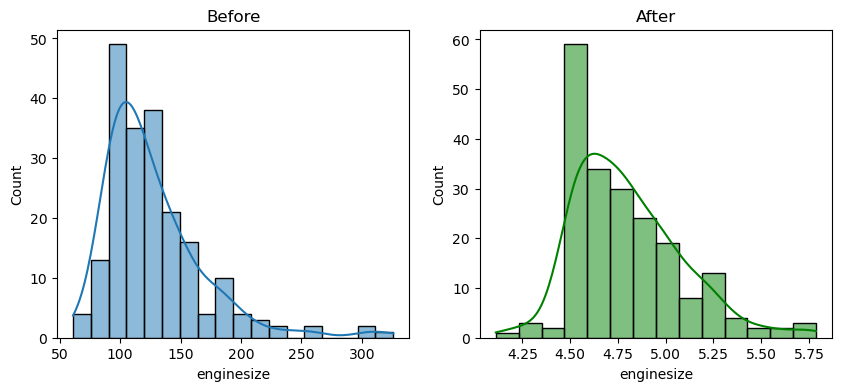

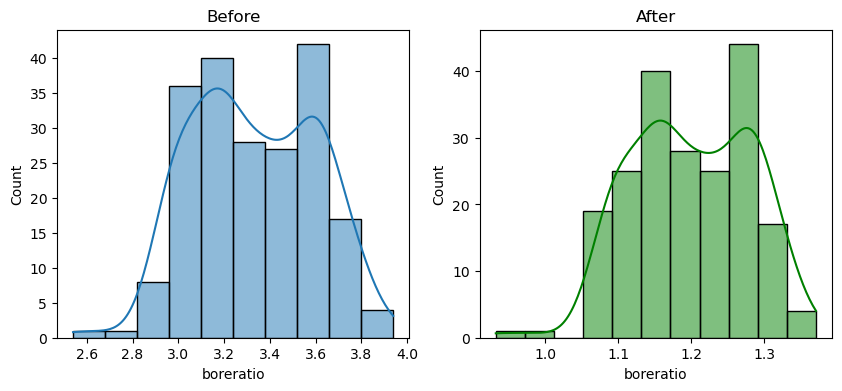

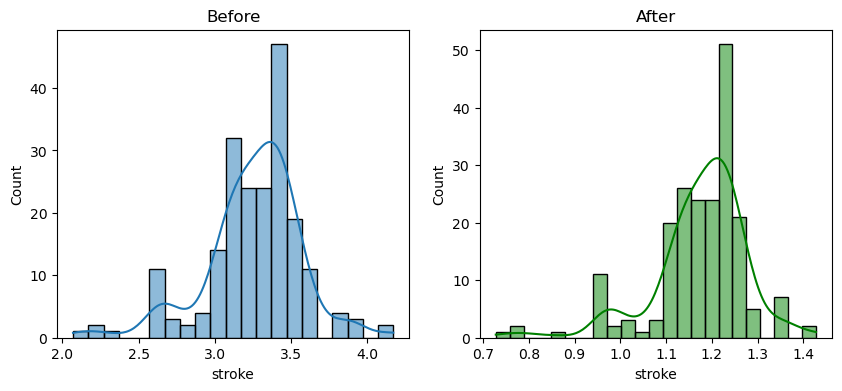

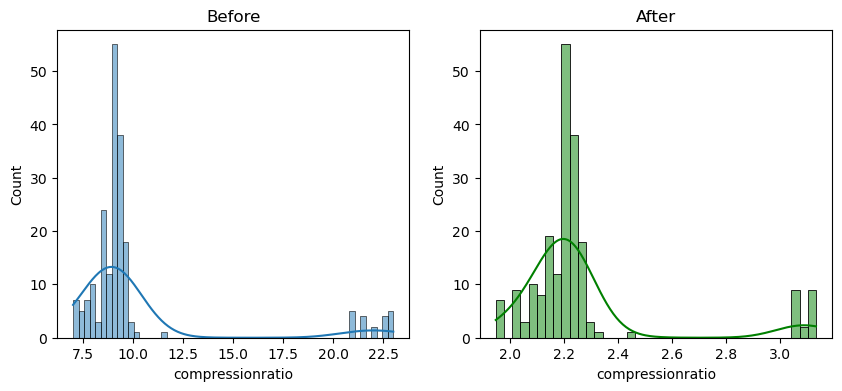

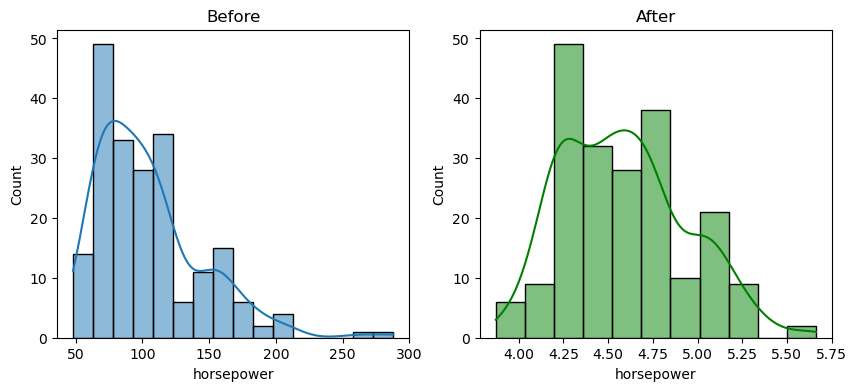

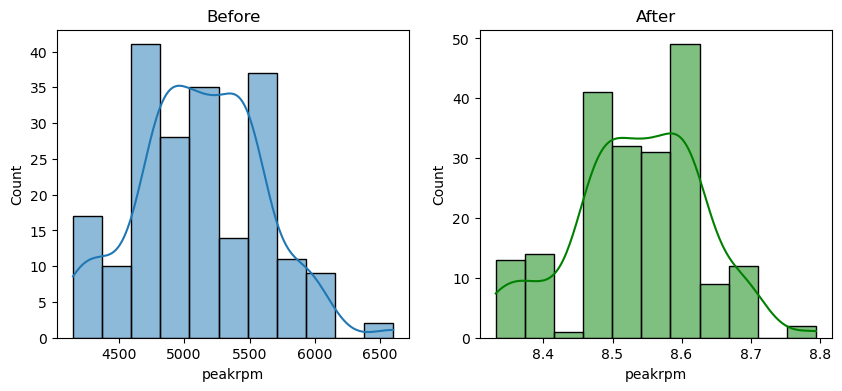

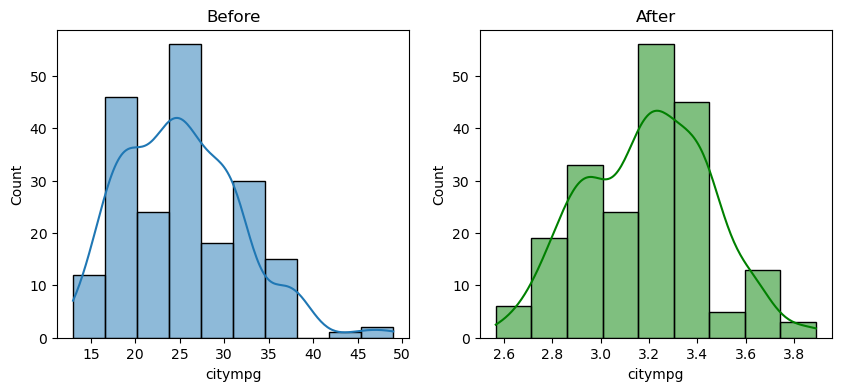

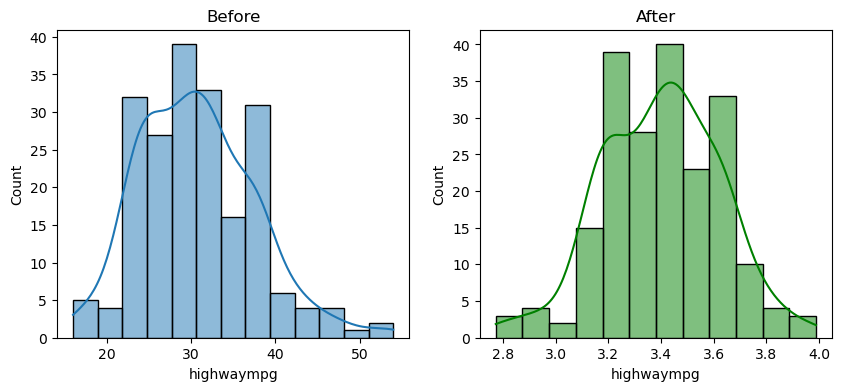

In [59]:
for i in num.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(num[i],kde=True)
    plt.title("Before")
    plt.subplot(1,2,2)
    sns.histplot(copy[i],color='green',kde=True)
    plt.title("After")
    plt.show()

In [60]:
copy.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,4.484132,5.128715,4.160444,...,4.867534,mpfi,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,13495.0
1,3,gas,std,two,convertible,rwd,front,4.484132,5.128715,4.160444,...,4.867534,mpfi,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,16500.0
2,1,gas,std,two,hatchback,rwd,front,4.548600,5.142832,4.182050,...,5.023881,mpfi,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,16500.0
3,2,gas,std,four,sedan,fwd,front,4.603168,5.173887,4.192680,...,4.691348,mpfi,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,13950.0
4,2,gas,std,four,sedan,4wd,front,4.599152,5.173887,4.195697,...,4.912655,mpfi,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,17450.0


## Feature Selection

In [61]:
copy.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [62]:
Selected_features=['fueltype','carbody','drivewheel',"fuelsystem",'cylindernumber','enginetype','horsepower','highwaympg','carwidth','price']

In [63]:
model_data=copy[Selected_features]

In [64]:
model_data.head()

,fueltype,carbody,drivewheel,fuelsystem,cylindernumber,enginetype,horsepower,highwaympg,carwidth,price
0,gas,convertible,rwd,mpfi,four,dohc,4.709530,3.295837,4.160444,13495.0
1,gas,convertible,rwd,mpfi,four,dohc,4.709530,3.295837,4.160444,16500.0
2,gas,hatchback,rwd,mpfi,six,ohcv,5.036953,3.258097,4.182050,16500.0
3,gas,sedan,fwd,mpfi,four,ohc,4.624973,3.401197,4.192680,13950.0
4,gas,sedan,4wd,mpfi,five,ohc,4.744932,3.091042,4.195697,17450.0


In [66]:
X=model_data.drop(['price'],axis=1)
Y=model_data['price']

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


In [68]:
ohe=pd.get_dummies(X[['fueltype','carbody','drivewheel','fuelsystem','cylindernumber','enginetype']],drop_first=True)

In [69]:
remain=X.drop(['fueltype','carbody','drivewheel','fuelsystem','cylindernumber','enginetype'],axis=1)

In [71]:
data_X=pd.concat([ohe,remain],axis=1)

In [100]:
xtr,xte,ytr,yte=train_test_split(data_X,Y,test_size=0.1,random_state=3)

In [101]:
lr=LinearRegression()

In [102]:
lr.fit(xtr,ytr)

LinearRegression()

In [109]:
pre=lr.predict(xte)
pre=pre.reshape(-1,1)
pre

array([[ 8564.49166443],
       [ 7598.53723198],
       [ 5372.49093886],
       [ 7524.90138037],
       [ 6653.00907109],
       [26601.75195235],
       [12901.47083817],
       [ 4316.54879533],
       [ 6516.42466813],
       [37717.61909027],
       [ 6027.2042183 ],
       [10419.35289263],
       [ 6516.42466813],
       [14613.68706073],
       [26594.19044649],
       [13902.49235932],
       [ 6414.60241949],
       [ 9693.38893322],
       [ 8718.87235257],
       [10449.69519602],
       [16955.59747285]])

In [110]:
yte

190     9980.0
184     7995.0
118     5572.0
166     9538.0
161     8358.0
70     31600.0
174    10698.0
155     8778.0
25      6692.0
71     34184.0
77      6189.0
147    10198.0
122     7609.0
102    14399.0
47     32250.0
189    11595.0
157     7198.0
38      9095.0
163     8058.0
142     7775.0
202    21485.0
Name: price, dtype: float64

In [113]:
r2_score(yte,pre)

0.9136013554218344

In [114]:
mean_absolute_error(yte,pre)

1904.876371197566

In [115]:
R=Ridge()
parameter={"alpha":[0.01,0.1,1,10,100]}

In [118]:
ridgecv=GridSearchCV(R,parameter,scoring="r2",cv=5)

In [119]:
ridgecv.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [120]:
pred=ridgecv.predict(xte)

In [121]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 0.1}
0.7495992671534356


In [122]:
mean_absolute_error(pred,yte)

1849.8080017167954